# MODELO DE ML PARA DETECTAR TRANSACCIONES FRAUDULENTAS

### Librerias

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importar datos

In [13]:
df = pd.read_csv('data.csv')

In [14]:
# Usar la columna dob para calcular la edad de los clientes
df['dob'] = pd.to_datetime(df['dob'])
df['dob'] = df['dob'].dt.year
df['age'] = 2025 - df['dob']

In [15]:
df = df[['gender','lat', 'long', 'city_pop', 'age', 
        'category', 'amt','merch_lat', 'merch_long',
       'customer_num_trans_1_day', 'customer_num_trans_7_day',
       'customer_num_trans_30_day',  'trans_time_hrs',
       'trans_time_is_night', 'trans_time_day', 'trans_date_is_weekend',
       'customer_avg_amout_1_day', 'customer_avg_amount_7_day',
       'customer_avg_amount_30_day', 'merchant_num_trans_1_day',
       'merchant_num_trans_7_day', 'merchant_num_trans_30_day',
       'merchant_risk_1_day', 'merchant_risk_7_day', 'merchant_risk_30_day',
       'merchant_risk_90_day', 'is_fraud'
    
]]

In [16]:
# Renombrar columnas 
reemplazos = {

    'gender': 'género',
    'lat': 'latitud',
    'long': 'longitud',
    'city pop': 'población de la ciudad',
    'category': 'categoría',
    'amt': 'monto',
    'merchant': 'comercio',
    'merch lat': 'latitud del comercio',
    'merch long': 'longitud del comercio',
    'customer num trans 1 day': 'número de transacciones del cliente en 1 día',
    'customer num trans 7 day': 'número de transacciones del cliente en 7 días',
    'customer num trans 30 day': 'número de transacciones del cliente en 30 días',
    'trans time hrs': 'horas de la hora de transacción',
    'trans time is night': 'la transacción es nocturna',
    'trans time day': 'día de la transacción',
    'trans date is weekend': 'la transacción es en fin de semana',
    'customer avg amout 1 day': 'promedio de monto del cliente en 1 día',
    'customer avg amount 7 day': 'promedio de monto del cliente en 7 días',
    'customer avg amount 30 day': 'promedio de monto del cliente en 30 días',
    'merchant num trans 1 day': 'número de transacciones del comercio en 1 día',
    'merchant num trans 7 day': 'número de transacciones del comercio en 7 días',
    'merchant num trans 30 day': 'número de transacciones del comercio en 30 días',
    'merchant risk 1 day': 'riesgo del comercio en 1 día',
    'merchant risk 7 day': 'riesgo del comercio en 7 días',
    'merchant risk 30 day': 'riesgo del comercio en 30 días',
    'merchant risk 90 day': 'riesgo del comercio en 90 días',
    'age': 'edad',
}

df.rename(columns=reemplazos, inplace=True)

In [17]:
df['is_fraud'].value_counts()

is_fraud
0    8485449
1      94806
Name: count, dtype: int64

In [18]:
# Concatenar is_fraud cuando es 1 y una muestra de is_fraud cuando es 0 de manera aleatoria que se balancen los datos
df = pd.concat([df[df['is_fraud'] == 1], df[df['is_fraud'] == 0].sample(n=94806)], axis=0)

In [19]:
df['is_fraud'].value_counts()

is_fraud
1    94806
0    94806
Name: count, dtype: int64

## Definir X y Y

Primero definimos nuestras caracteristicas (X) y nuestro objetivo (y).

In [20]:
y = df['is_fraud']
x = df.drop(columns=['is_fraud'])

## Dividir las características en numéricas y no numéricas

In [21]:
# Separar columnas numericas y categoricas
x_num = x.select_dtypes(include=[np.number])
x_cat = x.select_dtypes(exclude=[np.number])

## Procesamiento de caracteristicas no numéricas (one-hot encoding)

In [22]:
# Usar OneHotEncoder para las columnas categoricas
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder( sparse_output=False)
x_cat_encoded = encoder.fit_transform(x_cat)

In [23]:
# Crear un dataframe con las columnas ya codificadas y renombrar las columnas
x_cat_encoded = pd.DataFrame(x_cat_encoded, columns=encoder.get_feature_names_out(x_cat.columns))

## Estandarizar

## Tratamiento de características numéricas (StandardScaler)

In [24]:
# Estandarizar las columnas numericas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_num_scaled = scaler.fit_transform(x_num)

In [25]:
# Crear un dataframe con las columnas numericas y renombrar las columnas
x_num_scaled = pd.DataFrame(x_num_scaled, columns=x_num.columns)

In [26]:
# Unir los dataframes de columnas numericas y categoricas
x = pd.concat([x_num_scaled, x_cat_encoded], axis=1)

### Dividir el dataset en entrenamiento y prueba

In [27]:
# Dividir el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Entrenar un modelo de regresion logistica

In [28]:
# Entrenar un modelo de regresion logistica
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

### Evaluar el modelo de regresion logistica

In [29]:
# Evaluar el modelo
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

MAE: 0.16681169738681012


In [30]:
# Evaluar accuracy, precision, recall y f1-score
model.score(x_test, y_test)
print('Accuracy:', model.score(x_test, y_test))
#precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision:', precision)
#recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall:', recall)
#f1-score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

Accuracy: 0.8331883026131899
Precision: 0.8936356255074637
Recall: 0.7557973693941155
F1 Score: 0.8189571289565566


In [41]:
# Usar pycaret
from pycaret.classification import setup, compare_models, create_model, tune_model, predict_model, plot_model, evaluate_model, save_model

In [32]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [33]:
# Unir en un solo dataframe x_train y y_train
train = pd.concat([x_train, y_train], axis=1)

In [34]:
# Unir en un solo dataframe x_test y y_test
test = pd.concat([x_test, y_test], axis=1)

In [35]:
# Hcer el setup  de pycaret
clf1 = setup(data=train, test_data= test, target='is_fraud', session_id=42, index=False)

,Description,Value
0,Session id,42
1,Target,is_fraud
2,Target type,Binary
3,Original data shape,"(189612, 41)"
4,Transformed data shape,"(189612, 41)"
5,Transformed train set shape,"(151689, 41)"
6,Transformed test set shape,"(37923, 41)"
7,Numeric features,40
8,Preprocess,True
9,Imputation type,simple


In [36]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9342,0.9844,0.9347,0.9338,0.9342,0.8684,0.8684,1.3920
rf,Random Forest Classifier,0.9297,0.9800,0.9134,0.9441,0.9285,0.8593,0.8598,15.1130
gbc,Gradient Boosting Classifier,0.9220,0.9780,0.9176,0.9258,0.9217,0.8440,0.8441,14.8980
ada,Ada Boost Classifier,0.9062,0.9707,0.8944,0.9161,0.9051,0.8124,0.8127,4.6150
dt,Decision Tree Classifier,0.9050,0.9050,0.9051,0.9051,0.9051,0.8101,0.8101,1.5070
et,Extra Trees Classifier,0.8808,0.9468,0.8284,0.9254,0.8742,0.7615,0.7658,8.0530
svm,SVM - Linear Kernel,0.8532,0.8815,0.7563,0.9383,0.8375,0.7064,0.7201,0.2860
lr,Logistic Regression,0.8362,0.8973,0.7602,0.8967,0.8228,0.6724,0.6804,0.4810
ridge,Ridge Classifier,0.8270,0.8951,0.7537,0.8834,0.8134,0.6541,0.6613,0.1200
lda,Linear Discriminant Analysis,0.8270,0.8950,0.7538,0.8834,0.8134,0.6541,0.6613,0.2990


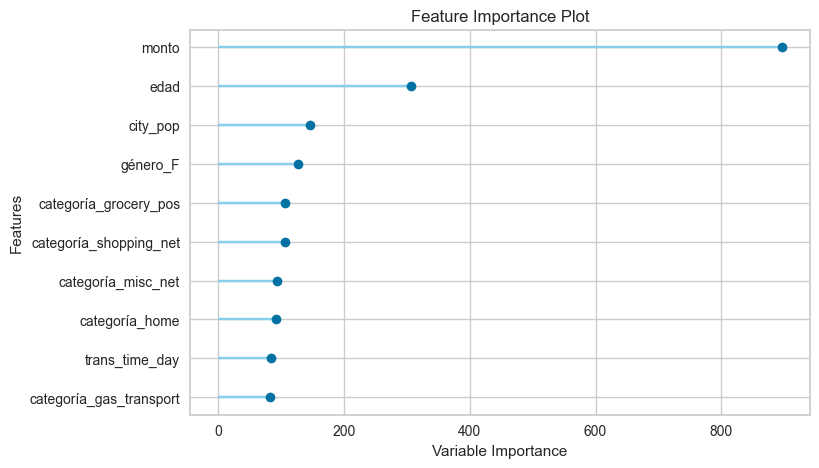

In [43]:
# Graficar la importancia de todas las variables
plot_model(best_model, plot='feature')

In [38]:
# Mejorar el modelo usando tune_model
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9305,0.9830,0.9325,0.9288,0.9307,0.8610,0.8610
1,0.9330,0.9839,0.9374,0.9293,0.9333,0.8660,0.8661
2,0.9338,0.9832,0.9346,0.9331,0.9339,0.8676,0.8676
3,0.9328,0.9842,0.9341,0.9316,0.9329,0.8655,0.8655
4,0.9295,0.9825,0.9300,0.9292,0.9296,0.8591,0.8591
5,0.9329,0.9832,0.9394,0.9274,0.9334,0.8658,0.8659
6,0.9294,0.9817,0.9321,0.9271,0.9296,0.8588,0.8588
7,0.9335,0.9848,0.9349,0.9323,0.9336,0.8670,0.8670
8,0.9344,0.9845,0.9378,0.9315,0.9347,0.8688,0.8688


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [39]:
# Evaluar el modelo
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [42]:
# Guardar el modelo
save_model(tuned_model, 'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['latitud', 'longitud', 'city_pop',
                                              'edad', 'monto', 'merch_lat',
                                              'merch_long',
                                              'customer_num_trans_1_day',
                                              'customer_num_trans_7_day',
                                              'customer_num_trans_30_day',
                                              'trans_time_hrs',
                                              'trans_time_is_night',
                                              'trans_time_day',
                                              'trans_date_is_weekend',
                                              'customer...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                             